# Scaling of Numerical Data

## Linear transformations

### Dependencies

In [1]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

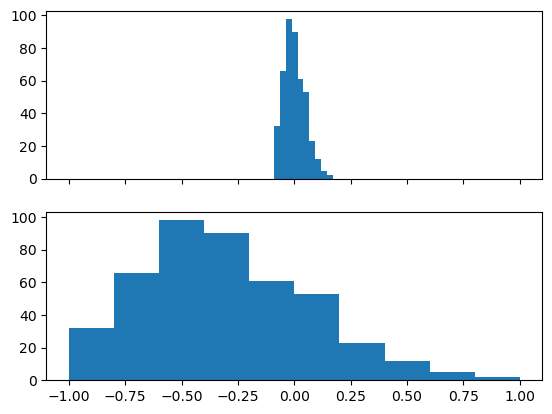

In [2]:
# Scaling rules
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

fix, axs = plt.subplots(2, 1, sharex = True)
axs[0].hist(raw)
axs[1].hist(scaled)

In [3]:
# Models for training
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [5]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
print('train raw: {}'.format(raw_time))
print('train scaled: {}'.format(scaled_time))

train raw: 0.033104625006671995
train scaled: 0.02138787499279715


- max-min scaling: best for uniformly distributed data
- z-score scaling: best for "normally" distributed data (Gaussian bell-shaped)

Sckikit Learn utilities: https://scikit-learn.org/stable/modules/preprocessing.html

## Nonlinear Transformations

In [7]:
df = pd.read_csv('data/cars.csv')
df.tail()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490
38530,Chrysler,Voyager,automatic,silver,297729,2000,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,True,632


<Axes: >

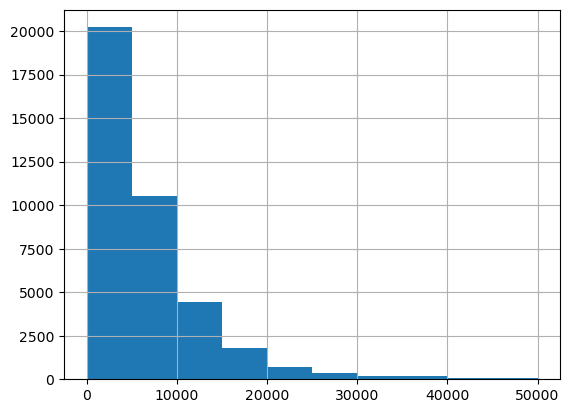

In [8]:
df.price_usd.hist()

### Transformation with tanh(x)

<Axes: >

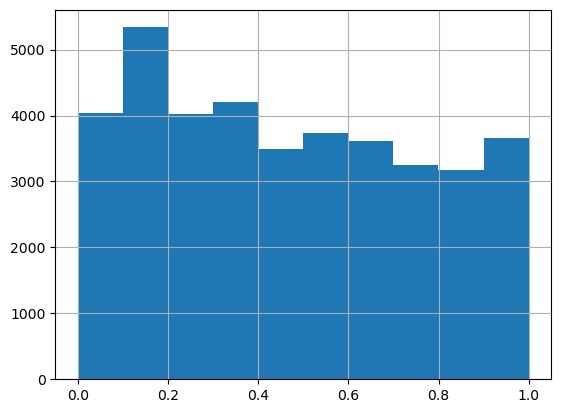

In [12]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

Map data to a normal distribution: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html